Total number of packets: 804
Number of unique addresses: 12
Address counts:
29:bb:c6:10:9b:60: 177 packets
88:c6:26:ed:90:ac: 489 packets
2b:0a:90:ac:52:31: 92 packets
74:42:ef:f3:b3:94: 30 packets
30:58:95:06:05:17: 6 packets
88:c6:26:03:f7:63: 3 packets
54:2e:c8:73:e5:db: 2 packets
60:74:f4:e0:e6:3f: 1 packets
6b:03:5b:6e:15:0b: 1 packets
59:fb:bd:60:b6:b7: 1 packets
69:00:74:d7:4f:3b: 1 packets
49:27:7c:ff:d9:1f: 1 packets
Packet type counts:
ADV_NONCONN_IND: 299 packets
ADV_IND: 460 packets
SCAN_REQ: 20 packets
SCAN_RSP: 25 packets


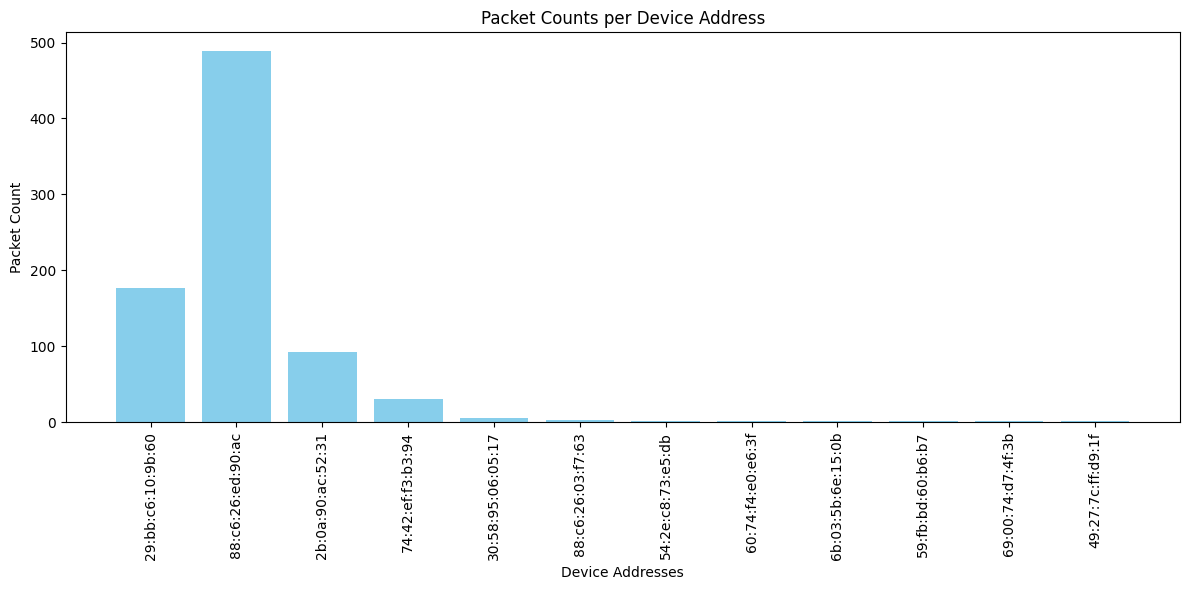

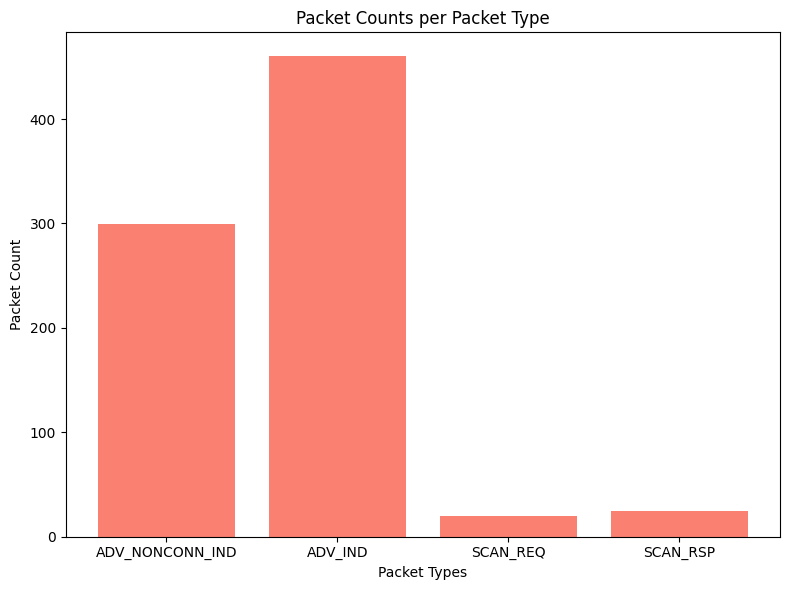

In [ ]:
from scapy.fields import *
from scapy.all import rdpcap
from scapy.layers.bluetooth4LE import BTLE, BTLE_ADV
import matplotlib.pyplot as plt

# Load the pcapng packet file into a list of packets
pcapng_absolute_filename = '/mnt/hgfs/share/input/le_capture_2024.pcapng'
bluetooth_le_packets = rdpcap(pcapng_absolute_filename)

# PDU type names mapping
pdu_type_names = {
    0x00: 'ADV_IND',
    0x01: 'ADV_DIRECT_IND',
    0x02: 'ADV_NONCONN_IND',
    0x03: 'SCAN_REQ',
    0x04: 'SCAN_RSP',
    0x05: 'CONNECT_REQ',
    0x06: 'ADV_SCAN_IND',
    0x08: 'LL_DATA',
    0x09: 'LL_DATA',
    0x0C: 'LL_CTRL',
    # Add more PDU types if necessary
}

# Calculate packet statistics
total_packets = len(bluetooth_le_packets)
print(f"Total number of packets: {total_packets}")

# Initialize counters
address_counts = {}
packet_type_counts = {}

for packet in bluetooth_le_packets:
    # Check if packet has BTLE layer
    if packet.haslayer(BTLE):
        btle_layer = packet.getlayer(BTLE)
        
        # Get PDU Type
        pdu_type_code = btle_layer.PDU_type
        pdu_type_name = pdu_type_names.get(pdu_type_code, f'Unknown({pdu_type_code})')
        packet_type_counts[pdu_type_name] = packet_type_counts.get(pdu_type_name, 0) + 1

        # For advertising packets, get addresses
        if packet.haslayer(BTLE_ADV):
            adv_layer = packet.getlayer(BTLE_ADV)
            if hasattr(adv_layer, 'AdvA'):
                address = adv_layer.AdvA
                if address:
                    address_counts[address] = address_counts.get(address, 0) + 1

# Print unique addresses
unique_addresses = len(address_counts)
print(f"Number of unique addresses: {unique_addresses}")
print("Address counts:")
for address, count in address_counts.items():
    print(f"{address}: {count} packets")

# Print packet type counts
print("Packet type counts:")
for ptype, count in packet_type_counts.items():
    print(f"{ptype}: {count} packets")

# Create bar chart for addresses
addresses = list(address_counts.keys())
counts = list(address_counts.values())

plt.figure(figsize=(12,6))
plt.bar(addresses, counts, color='skyblue')
plt.xlabel('Device Addresses')
plt.ylabel('Packet Count')
plt.title('Packet Counts per Device Address')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Create bar chart for packet types
packet_types = list(packet_type_counts.keys())
ptype_counts = list(packet_type_counts.values())

plt.figure(figsize=(8,6))
plt.bar(packet_types, ptype_counts, color='salmon')
plt.xlabel('Packet Types')
plt.ylabel('Packet Count')
plt.title('Packet Counts per Packet Type')
plt.tight_layout()
plt.show()
